In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

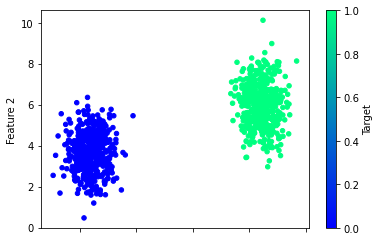

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features =2, random_state = 78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns = ["Feature 1", "Feature 2"])
df["Target"] = y

#Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c='Target', colormap="winter")

Train the data

In [4]:
# Use sklearn to split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 78)

NORMALIZE THE DATA

In [5]:
# Craete scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

CREATE THE NEURAL NETWORK

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add first Dense Layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = "relu", input_dim = 2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation ='sigmoid'))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the model to the trainig data
fit_model=nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 716us/step - loss: 0.4621 - accuracy: 0.9573
Epoch 2/100
24/24 [==============================] - 0s 669us/step - loss: 0.4501 - accuracy: 0.9600
Epoch 3/100
24/24 [==============================] - 0s 663us/step - loss: 0.4382 - accuracy: 0.9613
Epoch 4/100
24/24 [==============================] - 0s 697us/step - loss: 0.4269 - accuracy: 0.9653
Epoch 5/100
24/24 [==============================] - 0s 629us/step - loss: 0.4159 - accuracy: 0.9693
Epoch 6/100
24/24 [==============================] - 0s 708us/step - loss: 0.4055 - accuracy: 0.9707
Epoch 7/100
24/24 [==============================] - 0s 742us/step - loss: 0.3952 - accuracy: 0.9747
Epoch 8/100
24/24 [==============================] - 0s 799us/step - loss: 0.3855 - accuracy: 0.9773
Epoch 9/100
24/24 [==============================] - 0s 722us/step - loss: 0.3762 - accuracy: 0.9800
Epoch 10/100
24/24 [==============================] - 0s 653us/step - loss: 0.3672 - accura

24/24 [==============================] - 0s 637us/step - loss: 0.0968 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 667us/step - loss: 0.0954 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 669us/step - loss: 0.0940 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 660us/step - loss: 0.0926 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 642us/step - loss: 0.0912 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 636us/step - loss: 0.0899 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 679us/step - loss: 0.0886 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 713us/step - loss: 0.0873 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 697us/step - loss: 0.0861 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 663us/step - loss: 0.0848 - accuracy: 

VISUALIZE LOSS

<AxesSubplot:>

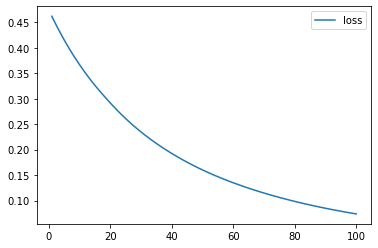

In [13]:
# Creaste a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

# PLot the loss
history_df.plot(y='loss')

<AxesSubplot:>

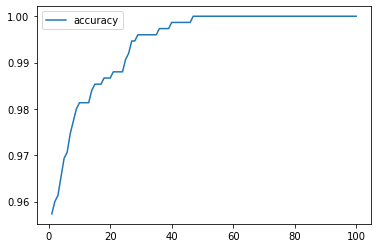

In [14]:
# PLot the accuracy
history_df.plot(y='accuracy')

Evalaute the model with the test data

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 2s - loss: 0.0688 - accuracy: 1.0000 - 2s/epoch - 255ms/step
loss: 0.06877607852220535, Accuracy: 1.0


PREDICT ON A NEW DATASET

In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])